# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [12]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Training set images shape: (50000, 32, 32, 3)
Training set labels shape: (50000, 1)
Test set images shape: (10000, 32, 32, 3)
Test set labels shape: (10000, 1)
Each image dimension: (32, 32, 3)
Number of classes: 100


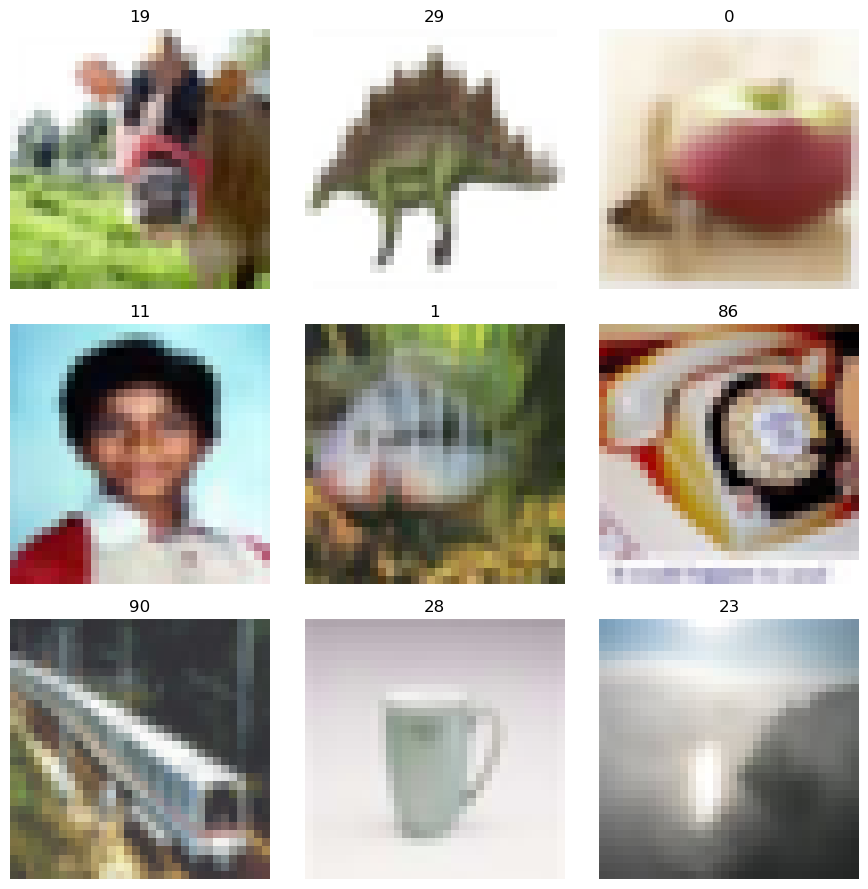

In [13]:
# Your code here
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Examine the shape of the training and test sets
print(f"Training set images shape: {x_train.shape}")
print(f"Training set labels shape: {y_train.shape}")
print(f"Test set images shape: {x_test.shape}")
print(f"Test set labels shape: {y_test.shape}")

# Examine the dimensions of the images
image_shape = x_train[0].shape
print(f"Each image dimension: {image_shape}") 

# Examine the number of classes
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

# Show 9 examples from the training set
plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)  # 3 rows x 3 columns
    plt.imshow(x_train[i])
    plt.title(y_train[i][0])
    plt.axis('off')

plt.tight_layout()
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [14]:
# Your code here
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
num_classes = 100 
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split the training set into training and validation sets
x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Your code here

model = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    # Second convolutional layer
    Conv2D(64, (7, 7), activation='relu'),
    MaxPooling2D((2, 2)),

    # Third convolutional layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 9, 9, 64)       │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204,580 (799.14 KB)

 Trainable params: 204,580 (799.14 KB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Categorical crossentropy is chosen because in this case I am dealing with multi-class classification where the labels are one-hot encoded.
- <b>Optimizer:</b> Adam optimizer is chosen because it uses adaptive learning rates and it works well with tasks with sparse gradients in neutral networks dealing with images.



In [17]:
from keras import optimizers

# Your code here
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.0436 - loss: 4.3061 - val_accuracy: 0.1168 - val_loss: 3.7603
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.1455 - loss: 3.5880 - val_accuracy: 0.1830 - val_loss: 3.4049
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.2018 - loss: 3.2522 - val_accuracy: 0.2207 - val_loss: 3.2033
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.2478 - loss: 3.0251 - val_accuracy: 0.2443 - val_loss: 3.0606
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.2832 - loss: 2.8508 - val_accuracy: 0.2672 - val_loss: 2.9496
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.3055 - loss: 2.7238 - val_accuracy: 0.2776 - val_loss: 2.8830
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.3294 - loss: 2.5988 - val_accuracy: 0.2957 - val_loss: 2.8229
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.3520 -

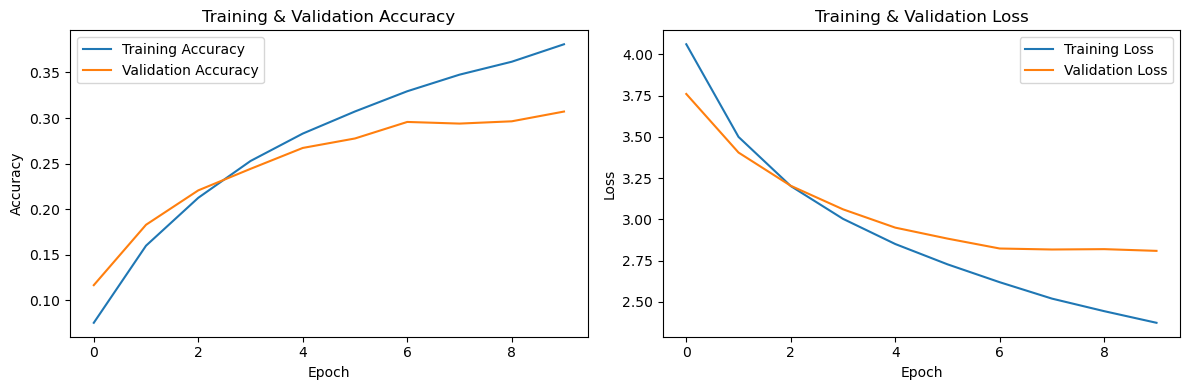

In [ ]:
# Your code here
history = model.fit(
    x_train, y_train,
    epochs=10,  
    batch_size=32,  
    validation_split=0.2,  
    verbose=1  
)

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training & Validation Accuracy")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training & Validation Loss")
plt.tight_layout()
plt.show()


**Number of epochs: 10**  
**Explaination**: the validation accuracy and validation loss stablizes at later epochs when the number is 10. When larger numbers of epochs are chosen (15 or 20), the validation accuracy starts going down (worse performance) and the validation loss starts going up(overfitting). 

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 0.3198
- <b>Other metric:</b> top 3 accuracy,which shows the percentage that the true class is in the top 3 predictions made by the model.
- <b>Reason for selection:</b> it shows how accurate the model's top 3 probable predictions are in the multi-class classification problem
- <b>Value of metric:</b> 0.5230
- <b>Interpretation of metric value:</b> There is a 52.3% chance that the model's top 3 predictions on a class include the true class. Combined with the accuracy value, we know that there is a 20.32% chance that that the prediction's 2nd or 3rd probable predictions include the true class of the images.

In [19]:
from keras.metrics import TopKCategoricalAccuracy

# Evaluate standard test accuracy and compute Top-3 accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
top_3_accuracy = TopKCategoricalAccuracy(k=3)(y_test, model.predict(x_test)).numpy()

# Print metrics
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Top-3 Test Accuracy: {top_3_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Test Accuracy: 0.3198
Top-3 Test Accuracy: 0.5230


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

Text(0.5, 1.0, 'Training & Validation Accuracy')

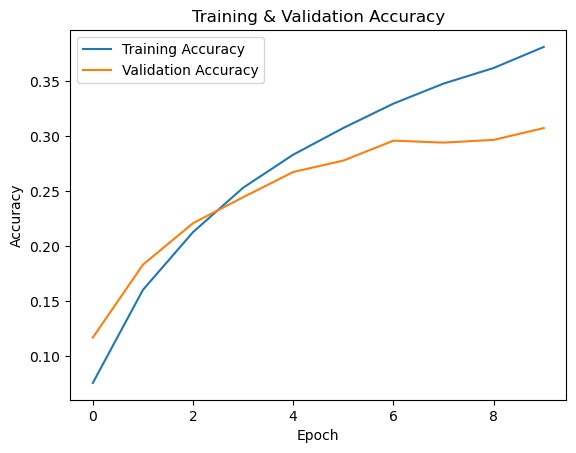

In [22]:
# Your code here

# Plot accuracy
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training & Validation Accuracy")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Correctly Classified Index: 1
Misclassified Index: 0


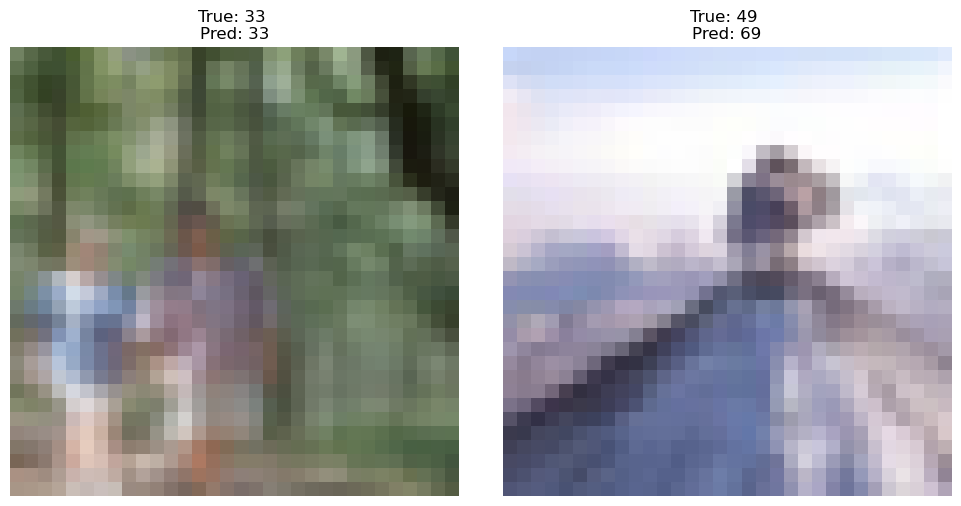

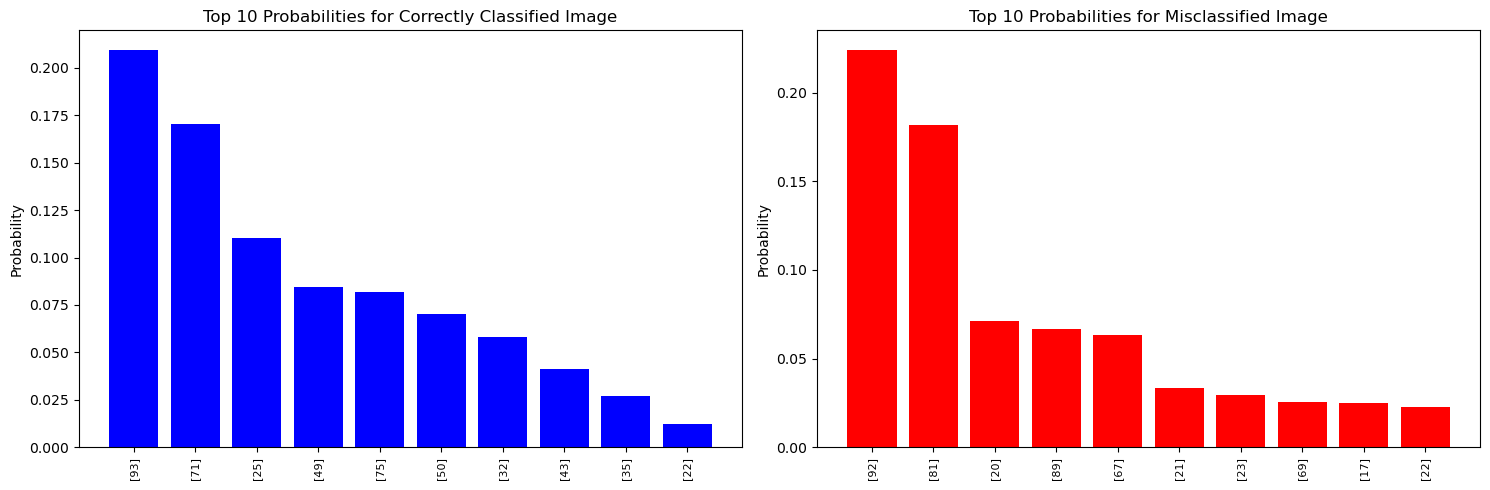


Model Probabilities for Correctly Classified Image:
[2.94466901e-07 1.90576771e-04 1.24419836e-04 7.05497048e-04
 1.94227183e-03 8.87792485e-05 5.07054734e-04 3.16424048e-05
 9.00727697e-03 6.51314273e-04 1.12839534e-05 9.15341006e-05
 2.84204166e-03 1.24355720e-04 2.03458374e-04 6.00106956e-04
 2.03774616e-04 1.08552485e-04 8.53353180e-03 1.36661623e-03
 6.24034219e-05 4.94601484e-03 6.14766759e-05 1.34992981e-04
 7.40987934e-06 2.01938499e-04 1.13118331e-04 4.90295934e-03
 2.11672334e-04 2.29349229e-04 2.80357577e-04 5.67371212e-03
 5.68857882e-04 2.09263653e-01 1.11958850e-02 2.37681466e-04
 1.41636803e-04 1.51337951e-03 1.10309303e-01 1.00153564e-02
 1.70915591e-05 5.93582634e-04 8.44042078e-02 1.28038204e-03
 2.36391020e-03 8.27588665e-04 9.37243807e-04 7.28351588e-04
 1.61443531e-05 2.66190978e-06 6.84268400e-03 1.07686257e-03
 7.98923793e-06 4.33319620e-08 1.55814960e-05 2.76406016e-03
 5.51935984e-03 4.56576709e-05 7.43566034e-06 9.76736657e-03
 2.86604774e-07 3.66935819e-05 2

In [31]:
# Select the 1st correctly classified test image and the 1st incorrectly classified test image
predictions = model.predict(x_test)

correct_idx, incorrect_idx = None, None
for idx, (true_label, pred_label) in enumerate(zip(y_test, predictions)):
    # Correctly classified
    if true_label.argmax() == pred_label.argmax():
        correct_idx = idx
        break

for idx, (true_label, pred_label) in enumerate(zip(y_test, predictions)):
    # Incorrectly classified
    if true_label.argmax() != pred_label.argmax():
        incorrect_idx = idx
        break

print(f"Correctly Classified Index: {correct_idx}")
print(f"Misclassified Index: {incorrect_idx}")

# Visualize the correctly classified image
plt.figure(figsize=(10, 5))

# Correct Image
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.axis('off')
plt.title(
    f"True: {y_test[correct_idx].argmax()} \nPred: {predictions[correct_idx].argmax()}"
)

# Incorrectly classified Image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.axis('off')
plt.title(
    f"True: {y_test[incorrect_idx].argmax()} \nPred: {predictions[incorrect_idx].argmax()}"
)

plt.tight_layout()
plt.show()

# Visualize the probabilities for classification using bar plots
plt.figure(figsize=(15, 5))

N = 10  # Only show the top 10 predictions
top_classes_correct = np.argsort(predictions[correct_idx])[-N:][::-1]  
top_classes_incorrect = np.argsort(predictions[incorrect_idx])[-N:][::-1]  

# Correctly Classified Image Probabilities
plt.subplot(1, 2, 1)
plt.bar(np.arange(N), predictions[correct_idx][top_classes_correct], color='blue')
plt.xticks(np.arange(N), [class_names[i] for i in top_classes_correct], rotation=90, fontsize=8)
plt.ylabel('Probability')
plt.title('Top 10 Probabilities for Correctly Classified Image')

# Incorrectly Classified Image Probabilities
plt.subplot(1, 2, 2)
plt.bar(np.arange(N), predictions[incorrect_idx][top_classes_incorrect], color='red')
plt.xticks(np.arange(N), [class_names[i] for i in top_classes_incorrect], rotation=90, fontsize=8)
plt.ylabel('Probability')
plt.title('Top 10 Probabilities for Misclassified Image')


plt.tight_layout()
plt.show()

print("\nModel Probabilities for Correctly Classified Image:")
print(predictions[correct_idx])

print("\nModel Probabilities for Incorrectly Classified Image:")
print(predictions[incorrect_idx])

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [51]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Model with padding added
model = Sequential([
    # First convolutional layer with padding
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    # Second convolutional layer with padding
    Conv2D(64, (7, 7), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # Third convolutional layer with padding
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
])

model.summary()

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,  
    batch_size=32,  
    validation_split=0.2,  
    verbose=1  
)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_65 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 16, 16, 64)     │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,340 (1.72 MB)

 Trainable params: 450,340 (1.72 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.0493 - loss: 4.2748 - val_accuracy: 0.1726 - val_loss: 3.4461
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.2063 - loss: 3.2586 - val_accuracy: 0.2498 - val_loss: 3.0549
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.2907 - loss: 2.8221 - val_accuracy: 0.2936 - val_loss: 2.8433
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.3558 - loss: 2.4981 - val_accuracy: 0.3401 - val_loss: 2.6473
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.4145 - loss: 2.2335 - val_accuracy: 0.3502 - val_loss: 2.5910
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.4552 - loss: 2.0403 - val_accuracy: 0.3607 - val_loss: 2.5761
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.4989 - loss: 1.8479 - val_accuracy: 0.3612 - val_loss: 2.6124
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.5411 -

**The techniques used: padding**
Padding adds extra layers of values (usually zeros) around the border of an input image so that spatial dimensions are preserved and fewer features are lost.

No tuning is needed. I choose "same" type of padding so that the output has the same dimension as the input.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [53]:
# Your code here
# Retrin your model using the same number of epochs
    # see above

# With the updated model, Calculate the accuracy and other selected metric on the test
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

top_3_accuracy = TopKCategoricalAccuracy(k=3)
top_3_accuracy.update_state(y_test, model.predict(x_test))


print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Top-3 Test Accuracy: {top_3_accuracy.result().numpy():.4f}")
 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Test Accuracy: 0.3639
Top-3 Test Accuracy: 0.5652


**Compare accuracy of the original model and the improved model**  
| Model             | Test Accuracy | Top-3 Test Accuracy |
|-------------------|---------------|----------------------|
| Improved Model    | 0.3639        | 0.5652               |
| Original Model    | 0.3198        | 0.5230               |



Text(0.5, 1.0, 'Training & Validation Accuracy')

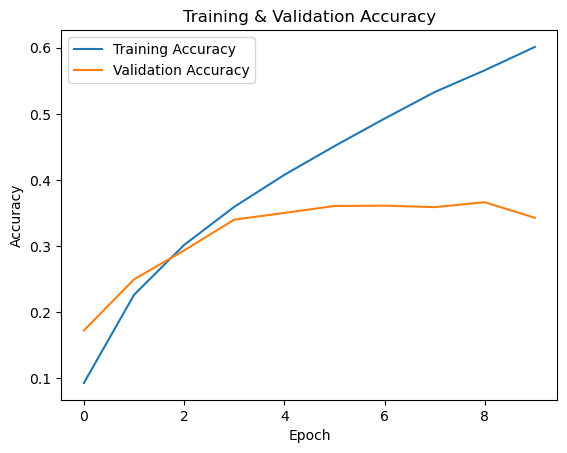

In [54]:

# Plot accuracy
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training & Validation Accuracy")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Correctly Classified Index: 1
Misclassified Index: 0


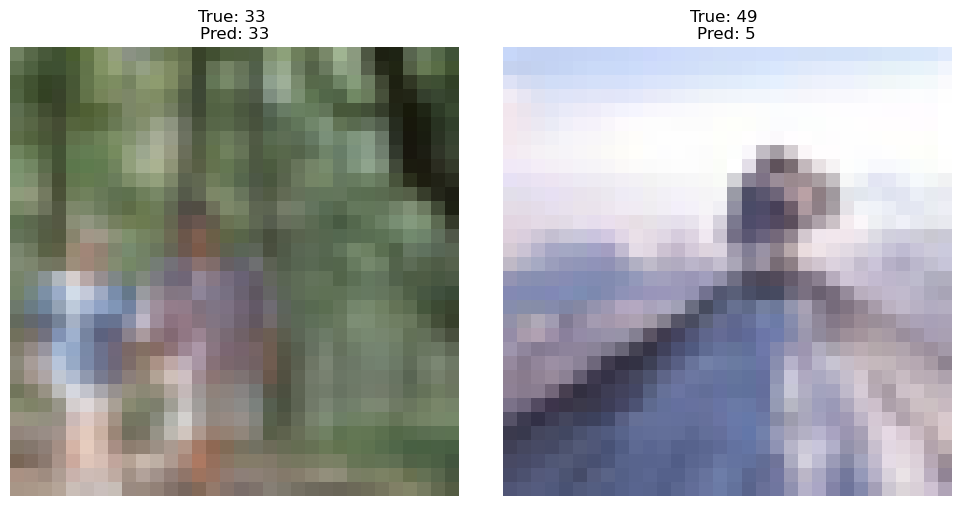

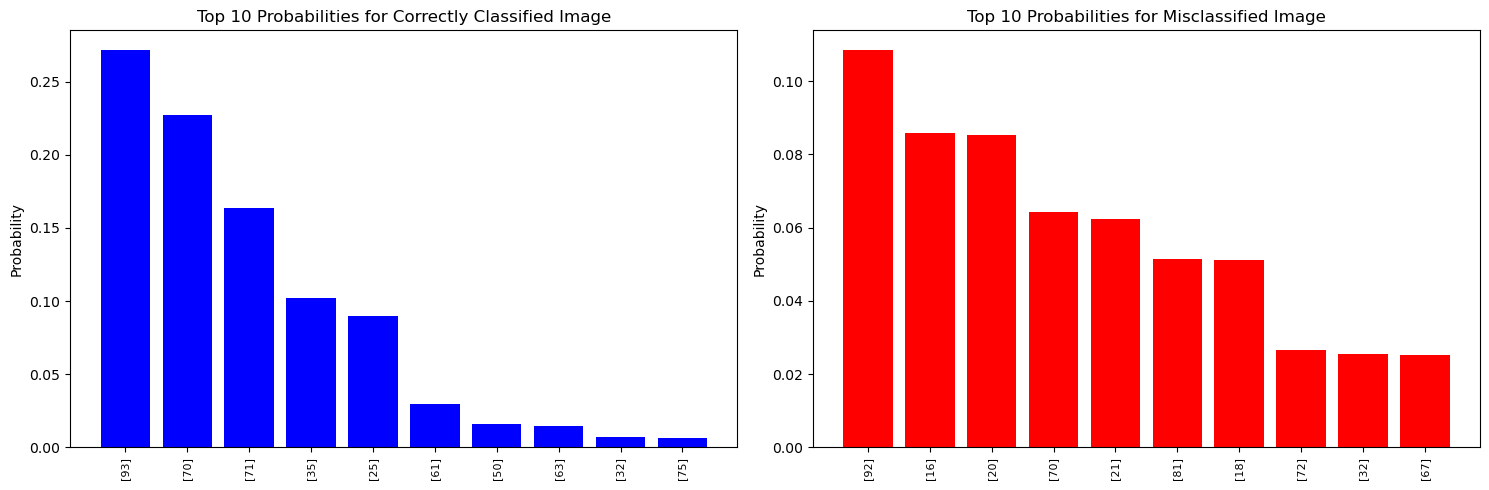


Model Probabilities for Correctly Classified Image:
[9.64705469e-05 8.47355928e-04 5.92174911e-05 4.61010635e-03
 2.63675087e-04 9.94523944e-05 2.35020576e-04 1.37383497e-04
 3.87828355e-03 2.59737764e-03 5.93046070e-06 1.10100249e-04
 8.06863478e-04 2.52081718e-05 1.02301965e-04 2.61340872e-04
 8.05937088e-05 1.71634001e-05 2.26953581e-01 6.86206156e-04
 6.59872939e-08 1.15484145e-04 1.66990139e-05 7.72006286e-04
 6.24349809e-07 1.27362867e-03 4.01472562e-06 5.22026187e-03
 5.50718396e-05 7.02594640e-04 2.41940172e-04 2.94258650e-02
 1.74833357e-03 2.71585584e-01 4.81645111e-03 7.79558468e-06
 5.44967188e-05 4.10395936e-04 8.97372514e-02 1.10302353e-03
 4.64453569e-06 2.86986557e-04 5.13885124e-03 1.25039787e-05
 3.34986532e-03 2.09155842e-04 5.07341683e-05 2.37031400e-05
 9.84224880e-06 9.64514584e-06 2.78495485e-03 2.02355921e-04
 5.20344145e-07 7.00323142e-07 1.88949169e-04 2.44073314e-03
 5.64146740e-03 2.29764148e-03 1.05086401e-05 1.87085930e-03
 1.64745012e-04 1.54322861e-05 1

In [55]:
# Select the 1st correctly classified test image and the 1st incorrectly classified test image
predictions = model.predict(x_test)

correct_idx, incorrect_idx = None, None
for idx, (true_label, pred_label) in enumerate(zip(y_test, predictions)):
    # Correctly classified
    if true_label.argmax() == pred_label.argmax():
        correct_idx = idx
        break

for idx, (true_label, pred_label) in enumerate(zip(y_test, predictions)):
    # Incorrectly classified
    if true_label.argmax() != pred_label.argmax():
        incorrect_idx = idx
        break

print(f"Correctly Classified Index: {correct_idx}")
print(f"Misclassified Index: {incorrect_idx}")

# Visualize the correctly classified image
plt.figure(figsize=(10, 5))

# Correct Image
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.axis('off')
plt.title(
    f"True: {y_test[correct_idx].argmax()} \nPred: {predictions[correct_idx].argmax()}"
)

# Incorrectly classified Image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.axis('off')
plt.title(
    f"True: {y_test[incorrect_idx].argmax()} \nPred: {predictions[incorrect_idx].argmax()}"
)

plt.tight_layout()
plt.show()

# Visualize the probabilities for classification using bar plots
plt.figure(figsize=(15, 5))

N = 10  # Only show the top 10 predictions
top_classes_correct = np.argsort(predictions[correct_idx])[-N:][::-1]  
top_classes_incorrect = np.argsort(predictions[incorrect_idx])[-N:][::-1]  

# Correctly Classified Image Probabilities
plt.subplot(1, 2, 1)
plt.bar(np.arange(N), predictions[correct_idx][top_classes_correct], color='blue')
plt.xticks(np.arange(N), [class_names[i] for i in top_classes_correct], rotation=90, fontsize=8)
plt.ylabel('Probability')
plt.title('Top 10 Probabilities for Correctly Classified Image')

# Incorrectly Classified Image Probabilities
plt.subplot(1, 2, 2)
plt.bar(np.arange(N), predictions[incorrect_idx][top_classes_incorrect], color='red')
plt.xticks(np.arange(N), [class_names[i] for i in top_classes_incorrect], rotation=90, fontsize=8)
plt.ylabel('Probability')
plt.title('Top 10 Probabilities for Misclassified Image')


plt.tight_layout()
plt.show()

print("\nModel Probabilities for Correctly Classified Image:")
print(predictions[correct_idx])

print("\nModel Probabilities for Incorrectly Classified Image:")
print(predictions[incorrect_idx])

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here
- Briefly discuss the results. 
- Did the model's performance improve?   
    Answer: Yes  
      
- Why do you think this is?  
    Answer: Padding helps preserve spatial dimensions and enables the model to better capture the features at the edges of the input image.  
      
- Do you think there is room for further improvement? Why or why not?  
    Answer: Yes if combined with other techniques. Because: 1 the validation accuracy is slightly going down at the end, suggesting possible overfitting; 2. other techniques incl. regularization (e.g. dropout or L2 regularization) and tuning hyperparameters (e.g. learning rate) might help.  
      
- What other techniques might you try in the future?  
    Answer: As replied above, dropout, L2 regularization, learning rate adustment. 


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.